<a href="https://colab.research.google.com/github/kjcoursera/TensorFlow/blob/main/Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [5]:
fashion_mnist =  tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) =  fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
len(test_labels)

10000

In [11]:
len(test_images)

10000

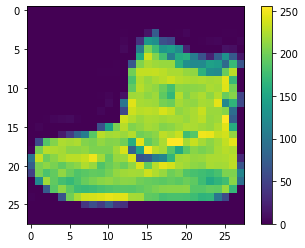

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [13]:
train_images  = train_images/255.0
test_images =  test_images/255.0

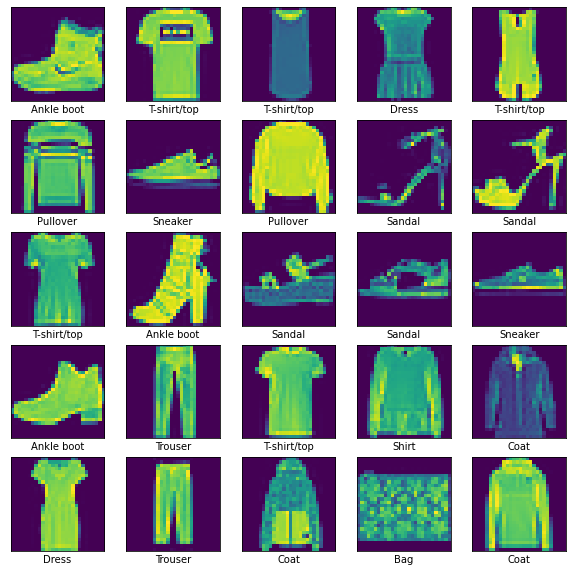

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
class_names[train_labels[100]]

'Bag'

In [17]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

In [26]:
def create_model(my_learning_rate):
  model =  tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
   # Define a dropout regularization layer. 
  #model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units = 128, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))

  model.add(tf.keras.layers.Dense(units=10, activation='softmax')) 
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])  
  return model


def train_model(model, train_images, train_labels, epochs, batch_size, validation_split):
  history =  model.fit(x=train_images, y=train_labels, batch_size = batch_size,
                       epochs = epochs , shuffle = True,
                       validation_split =  validation_split)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist


In [27]:
learning_rate = 0.001
epochs = 50
batch_size = 1000
validation_split = 0.3

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, train_images, train_labels, 
                           epochs, batch_size, validation_split)


Epoch 1/50
42/42 [==============================] - 1s 34ms/step - loss: 1.8906 - accuracy: 0.5965 - val_loss: 1.7085 - val_accuracy: 0.7568
Epoch 2/50
42/42 [==============================] - 1s 31ms/step - loss: 1.6855 - accuracy: 0.7861 - val_loss: 1.6529 - val_accuracy: 0.8133
Epoch 3/50
42/42 [==============================] - 1s 30ms/step - loss: 1.6484 - accuracy: 0.8188 - val_loss: 1.6398 - val_accuracy: 0.8239
Epoch 4/50
42/42 [==============================] - 1s 30ms/step - loss: 1.6314 - accuracy: 0.8342 - val_loss: 1.6260 - val_accuracy: 0.8377
Epoch 5/50
42/42 [==============================] - 1s 31ms/step - loss: 1.6194 - accuracy: 0.8460 - val_loss: 1.6218 - val_accuracy: 0.8412
Epoch 6/50
42/42 [==============================] - 1s 31ms/step - loss: 1.6140 - accuracy: 0.8500 - val_loss: 1.6182 - val_accuracy: 0.8451
Epoch 7/50
42/42 [==============================] - 1s 31ms/step - loss: 1.6082 - accuracy: 0.8549 - val_loss: 1.6072 - val_accuracy: 0.8563
Epoch 8/50
42

In [28]:
# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
test_loss, test_acc =   my_model.evaluate(test_images, test_labels, batch_size=batch_size)




 Evaluate the new model against the test set:
10/10 [==============================] - 0s 10ms/step - loss: 1.5783 - accuracy: 0.8831


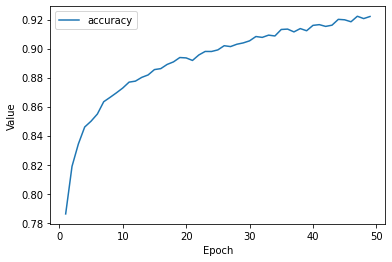

In [29]:
# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [34]:
probability_model = tf.keras.Sequential([my_model, 
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

In [36]:
predictions[10]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color ='blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


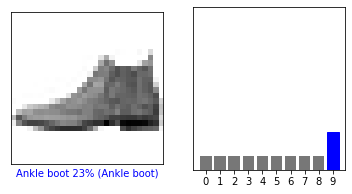

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

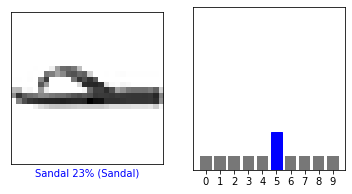

In [42]:
i = 106
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


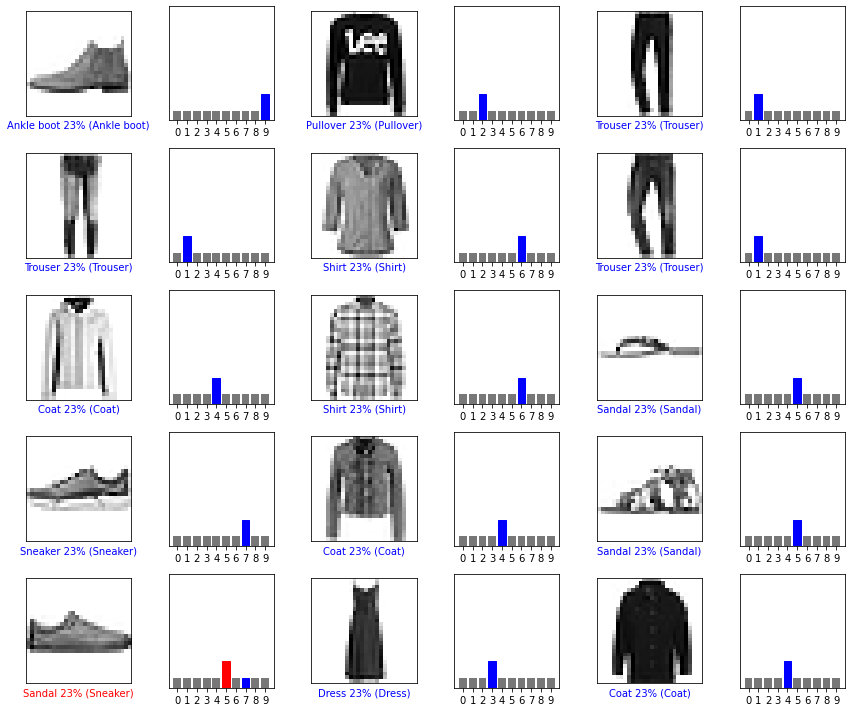

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
